# Pymaceuticals Inc.
---

### Analysis

- Across the total treatment groups, Ramicane outperforms Capomulin in treatment as the average Tumor Volume in measurement of the mean and median is lower, along with the standard deviation.
- Capomulin is the second best treatment indicated by the second best boxplot statistics (lower, upper bounds and quartiles). 
- Tumor volume looks to be postively correlatd to the size of the mouse weight (R value of .84). One can assume that treatment amount would also increase with the increase in size of a mouse.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combine["Mouse ID"].value_counts())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = combine.loc[combine.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()
dups

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dups_df= combine.loc[combine["Mouse ID"] == "g989",:]
dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned= combine[combine["Mouse ID"].isin(dups)== False]


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(cleaned["Mouse ID"].value_counts())
mice_count

248

In [7]:
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_regimen= cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_r= cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_r= cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_r =  cleaned.groupby(["Drug Regimen"]).sem(ddof=4)["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_1 = pd.DataFrame({"Mean Tumor Volume":mean_regimen,"Median Tumor Volume": median_regimen,\
                         "Variance Tumor Volume":variance_r,"Std. Tumor Volume":std_r,"Std.Err Tumor Volume":sem_r})
summary_1
    
    



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Tumor Volume,Std.Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.331524
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.473853
Infubinol,52.884795,51.820584,43.128684,6.567243,0.496461
Ketapril,55.235638,53.698743,68.553577,8.279709,0.608763
Naftisol,54.331565,52.509285,66.173479,8.134708,0.601362
Placebo,54.033581,52.288934,61.168083,7.821003,0.586236
Propriva,52.320930,50.446266,43.852013,6.622085,0.549973
Ramicane,40.216745,40.673236,23.486704,4.846308,0.323097
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.577947


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_2= cleaned.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

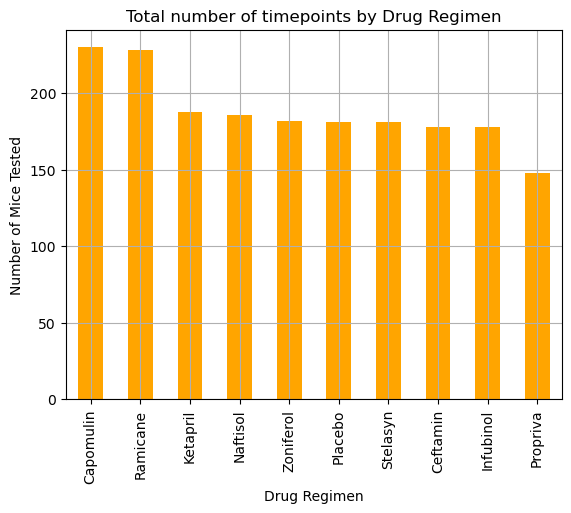

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Regimen= cleaned.groupby("Drug Regimen")

timepoints = Regimen["Timepoint"].count().sort_values(ascending=False)

chart= timepoints.plot(kind='bar',title= "Total number of timepoints by Drug Regimen",color='orange')
plt.ylabel("Number of Mice Tested")
plt.tight_layout
plt.grid()
plt.show()

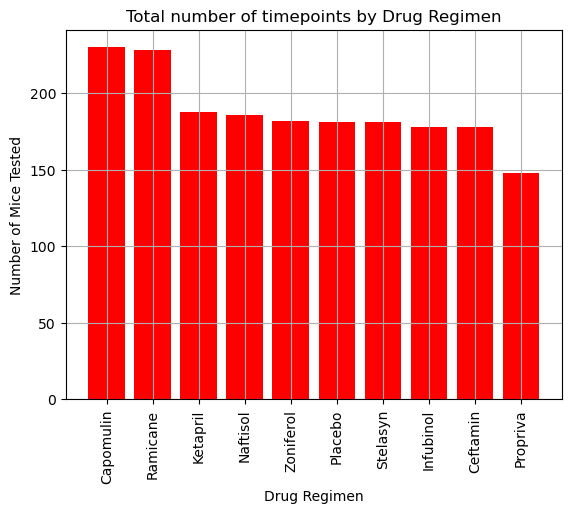

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
m_count = cleaned["Drug Regimen"].value_counts()
x_axis= m_count.index.values
y_axis=m_count.values


plt.bar(x_axis,y_axis,color='r')
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.title("Total number of timepoints by Drug Regimen")
plt.tight_layout
plt.grid()
plt.show()

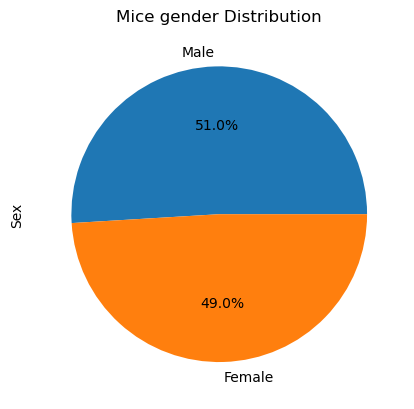

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count= cleaned["Sex"].value_counts()

sex_count.plot(kind="pie",autopct="%1.1f%%",title="Mice gender Distribution")
plt.show()

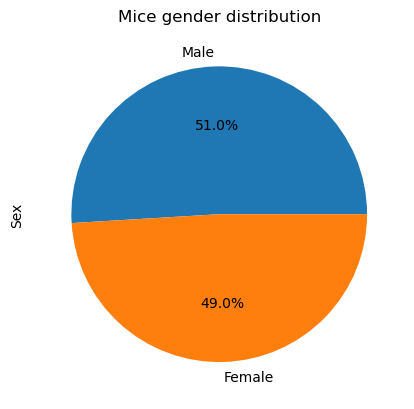

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count,autopct="%1.1f%%",labels=sex_count.index.values)
plt.title("Mice gender distribution")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_timepoint = combine.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint=final_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_finaltp= final_timepoint.merge(combine, on =["Mouse ID","Timepoint"])
merge_finaltp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments= ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in treatments:
#     Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merge_finaltp.loc[merge_finaltp["Drug Regimen"] == x, "Tumor Volume (mm3)"]

   # add subset
    final_tumor_vol.append(tumor)

# Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    lq= quartiles[.25]
    uq = quartiles[.75]
    iqr= uq-lq
    
    lower_b= lq- (1.5*iqr)
    upper_b= uq + (1.5*iqr)
    outlier = tumor.loc[(tumor < lower_b)  | (tumor > upper_b)]
    print(f" {x} has the potential outliers: {outlier}")

 Capomulin has the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane has the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol has the potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin has the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Total Volume by Drug Treatments')

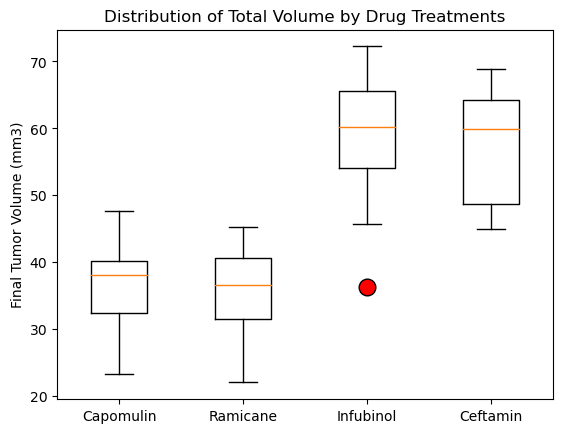

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1= plt.subplots()
ax1.boxplot(final_tumor_vol,labels=treatments,flierprops= dict(markerfacecolor="red",markersize=12),)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Distribution of Total Volume by Drug Treatments")


## Line and Scatter Plots

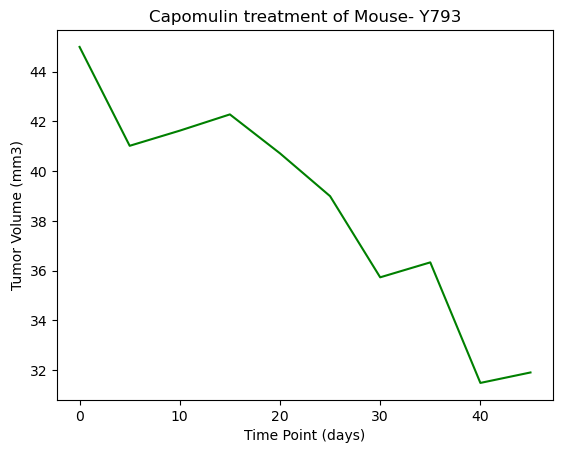

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df= cleaned[cleaned["Drug Regimen"] == "Capomulin"]
# Mouse Id y793 has the highest Tumor Volume
mouse_y793= cleaned[cleaned["Mouse ID"]== "y793"]
m_xaxis= mouse_y793["Timepoint"]
m_yaxis= mouse_y793["Tumor Volume (mm3)"]

plt.plot(m_xaxis,m_yaxis,color='g')
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse- Y793")
plt.show()

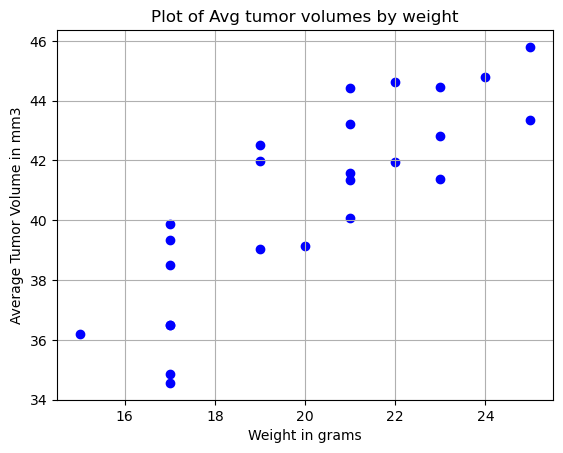

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average= capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()
weight= average["Weight (g)"]
t= average["Tumor Volume (mm3)"]
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume in mm3")
plt.title("Plot of Avg tumor volumes by weight")
plt.scatter(weight,t,color="blue")
plt.grid()
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor= st.pearsonr(weight,t)
correlation=round(cor[0],2)

print(f"The correlation between average tumor size and weight is {correlation}")


The correlation between average tumor size and weight is 0.84


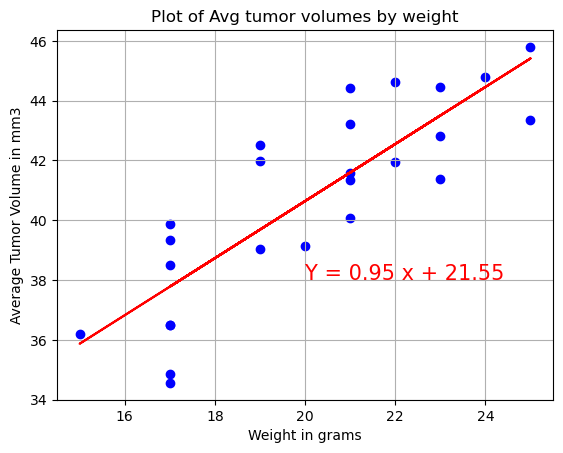

In [20]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,t)
equation = weight*slope + intercept
line= f"Y = {round(slope,2)} x + {round(intercept,2)}"

plt.plot(weight,equation,color="r")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume in mm3")
plt.title("Plot of Avg tumor volumes by weight")
plt.scatter(weight,t,color="blue")
plt.annotate(line,(20,38),color="r",fontsize=15)
plt.grid()
plt.show()